In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
ImgSize = 224
BatchSize = 32
Channel = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    shuffle=True,
    image_size = (ImgSize,ImgSize),
    batch_size = BatchSize
)

Found 5192 files belonging to 2 classes.


In [4]:
classes = dataset.class_names
classes

['Normal', 'OSCC']

In [5]:
len(dataset)

163

In [6]:
for img,label in dataset.take(1):
    print(img.shape)
    print(label.numpy())

(32, 224, 224, 3)
[1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1]


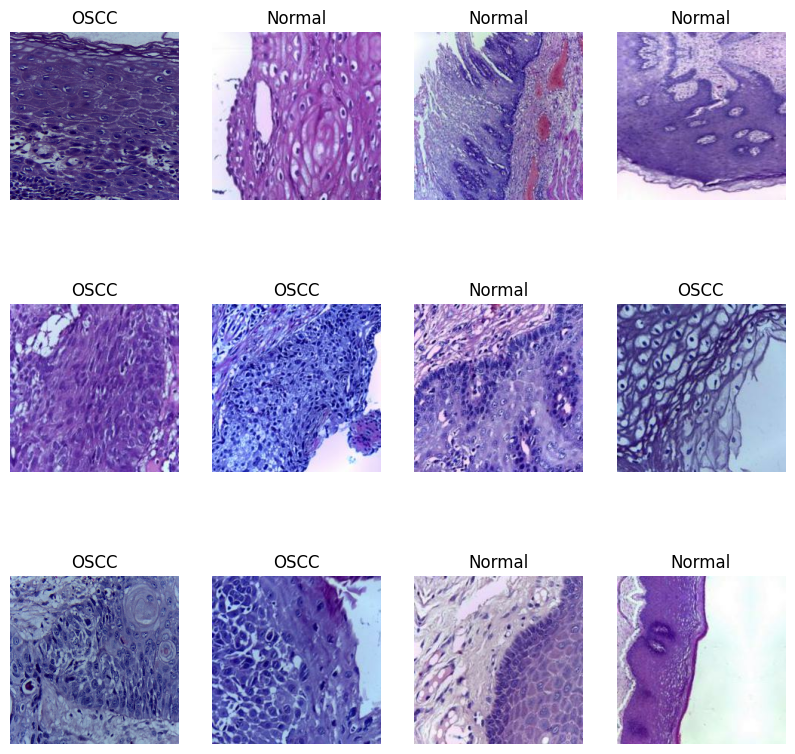

In [7]:
plt.figure(figsize = (10,10))
for img,label in dataset.take(1).as_numpy_iterator():
    for i in range(12):
        image = img[i]
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image.astype('uint8'))
        plt.title(classes[label[i]])
        plt.axis("off")

In [8]:
train_size = 0.8
test_size = 0.1
val_size = 0.1

In [9]:
len_data = len(dataset)
len_data

163

In [10]:
train_size*len_data

130.4

In [11]:
test_size*len_data

16.3

In [12]:
train_set = dataset.take(int(len_data*train_size))
len(train_set)

130

In [13]:
remaining_set = dataset.skip(int(len_data*train_size))
len(remaining_set)

33

In [14]:
test_set = remaining_set.take(int(len_data*test_size))
len(test_set)

16

In [15]:
val_set = remaining_set.skip(int(len_data*test_size))
len(val_set)

17

In [16]:
train_set = train_set.cache().shuffle(1000)
test_set = test_set.cache().shuffle(1000)
val_set = val_set.cache().shuffle(1000)

In [17]:
resizing_and_rescaling = tf.keras.Sequential([
    layers.Resizing(ImgSize,ImgSize),
    layers.Rescaling(1.0/255)
])

In [18]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [19]:
input_shape = (BatchSize,ImgSize,ImgSize,Channel)
number_of_classes = 2

In [20]:
model = tf.keras.Sequential([
    resizing_and_rescaling,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(number_of_classes,activation='softmax'),
    
])

C:\Users\Praveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 109, 109, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 54, 54, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 52, 52, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 26, 26, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 24, 24, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 12, 12, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 10, 10, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 1600)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 2)                     │           3,202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,378 (521.01 KB)

 Trainable params: 133,378 (521.01 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)

In [32]:
model.fit(
    train_set,
    epochs=15,
    batch_size = BatchSize,
    verbose=1,
    validation_data = val_set
)

Epoch 1/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 94s 723ms/step - accuracy: 0.9424 - loss: 0.1353 - val_accuracy: 0.9096 - val_loss: 0.2531
Epoch 2/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 93s 718ms/step - accuracy: 0.9422 - loss: 0.1435 - val_accuracy: 0.8788 - val_loss: 0.4016
Epoch 3/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 93s 715ms/step - accuracy: 0.9463 - loss: 0.1366 - val_accuracy: 0.8962 - val_loss: 0.2714
Epoch 4/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 93s 714ms/step - accuracy: 0.9543 - loss: 0.1164 - val_accuracy: 0.9173 - val_loss: 0.2185
Epoch 5/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 93s 716ms/step - accuracy: 0.9525 - loss: 0.1195 - val_accuracy: 0.9077 - val_loss: 0.2268
Epoch 6/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 93s 719ms/step - accuracy: 0.9453 - loss: 0.1334 - val_accuracy: 0.8981 - val_loss: 0.2945
Epoch 7/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 93s 714ms/step - accuracy: 0.9464 - loss: 0.1297 - val_accuracy: 0.8981 - val_loss: 0.2584
Epoch 8/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 93s 715ms/step - accuracy: 0.9317 - loss: 0

In [33]:
score = model.evaluate(test_set)
score

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.9320 - loss: 0.1794


[0.20577408373355865, 0.919921875]

In [34]:
model_version = 2

In [35]:
os.makedirs(f"Oral_Model/{model_version}/", exist_ok=True)

In [36]:
model.save(f"Oral_Model/{model_version}/OralCancerModel.keras")